<a href="https://colab.research.google.com/github/jcmachicao/deep_learning_2025_curso/blob/main/S06__Metricas_Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas de Evaluación de Modelos en Deep Learning (Guía + Ejemplo PyTorch)
# ------------------------------------------------------------------------------
#### En este notebook aprenderás:
#### 1. Qué son las métricas de evaluación.
#### 2. Las más comunes en clasificación y regresión.
#### 3. Cómo implementarlas y visualizarlas en PyTorch.

In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 21.9 MB/s eta 0:00:00


Epoch 0: Loss=0.7027 | Acc=0.524 | F1=0.524
Epoch 1: Loss=0.6691 | Acc=0.653 | F1=0.653
Epoch 2: Loss=0.5959 | Acc=0.762 | F1=0.762
Epoch 3: Loss=0.5668 | Acc=0.827 | F1=0.827
Epoch 4: Loss=0.5191 | Acc=0.870 | F1=0.870
Epoch 5: Loss=0.4939 | Acc=0.890 | F1=0.890
Epoch 6: Loss=0.4515 | Acc=0.907 | F1=0.907
Epoch 7: Loss=0.4271 | Acc=0.927 | F1=0.927
Epoch 8: Loss=0.3336 | Acc=0.932 | F1=0.932
Epoch 9: Loss=0.3506 | Acc=0.947 | F1=0.947


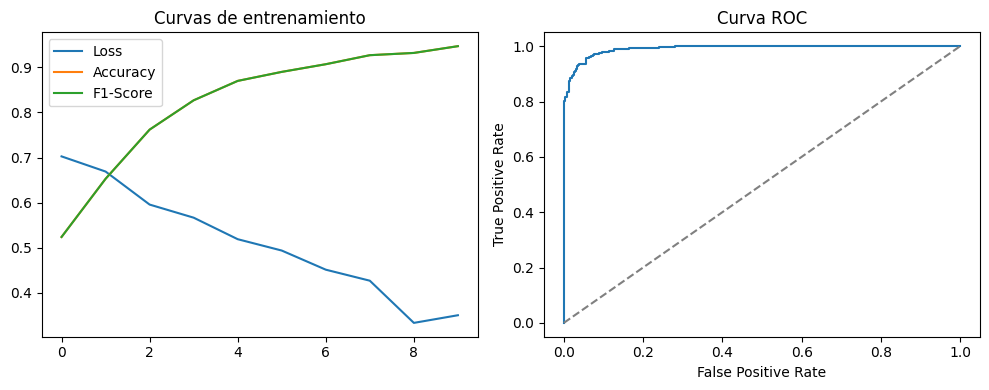

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics.classification import Accuracy, F1Score, ROC
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1️⃣ CONCEPTO
# ------------------------------------------------------------------------------
# Las métricas de evaluación son valores numéricos que indican qué tan bien
# está funcionando un modelo. Se calculan con datos de validación o prueba.
# Ejemplos: precisión (accuracy), recall, F1-score, error cuadrático medio, etc.

# ------------------------------------------------------------------------------
# 2️⃣ SIMULACIÓN DE UN CASO DE CLASIFICACIÓN BINARIA
# ------------------------------------------------------------------------------

# Creamos datos sintéticos
torch.manual_seed(0)
X = torch.randn(1000, 10)
y = (X[:, 0] + 0.5 * X[:, 1] > 0).long()

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Pequeño modelo
class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.fc(x)

model = SimpleClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Métricas de torchmetrics
acc_metric = Accuracy(task="multiclass", num_classes=2)
f1_metric = F1Score(task="multiclass", num_classes=2)
roc_metric = ROC(task="binary")

train_losses, accs, f1s = [], [], []

for epoch in range(10):
    for xb, yb in loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

    # Evaluación simple por época
    with torch.no_grad():
        preds = model(X)
        probs = F.softmax(preds, dim=1)[:, 1]
        acc = acc_metric(preds, y)
        f1 = f1_metric(preds, y)
        fpr, tpr, _ = roc_metric(probs, y)

    train_losses.append(loss.item())
    accs.append(acc.item())
    f1s.append(f1.item())

    print(f"Epoch {epoch}: Loss={loss.item():.4f} | Acc={acc.item():.3f} | F1={f1.item():.3f}")

# ------------------------------------------------------------------------------
# 3️⃣ VISUALIZACIÓN DE RESULTADOS
# ------------------------------------------------------------------------------

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Loss')
plt.plot(accs, label='Accuracy')
plt.plot(f1s, label='F1-Score')
plt.legend()
plt.title('Curvas de entrenamiento')

plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# 🧠 INTERPRETACIÓN PEDAGÓGICA
# ------------------------------------------------------------------------------
 - La pérdida (Loss) mide qué tan equivocadas son las predicciones.
 - La Accuracy mide la proporción de aciertos totales.
 - El F1 combina precisión y recall (útil en clases desbalanceadas).
 - La curva ROC muestra la capacidad del modelo para separar clases
   en distintos umbrales de decisión.

 Así los estudiantes pueden visualizar cómo cambian estas métricas
 durante el entrenamiento y entender las compensaciones entre ellas.
